<a href="https://colab.research.google.com/github/ingabLee/MyCodes/blob/main/Advertising_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 필요한 라이브러리 불러오기

# 데이터 로딩, 탬색적 데이터 분석, 그래프용 라이브러리
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
%matplotlib inline
# shift + enter => 실행및 다음셀로 이동

In [2]:
# dataset을 pandas dataframe으로 읽어오기   blob(binary large object)
url = 'https://github.com/books-by-chansung/low-code-ai/blob/main/advertising_2023.csv?raw=true'
advertising_df = pd.read_csv(url, index_col=0)

In [3]:
advertising_df.head()

,digital,TV,radio,newspaper,sales
1,345.15,156.0,37.8,69.2,22.1
2,66.75,46.0,39.3,45.1,10.4
3,25.80,18.3,45.9,69.3,9.3
4,227.25,145.1,41.3,58.5,18.5
5,271.20,165.2,10.8,58.4,12.9


In [4]:
advertising_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1199 entries, 1 to 1197
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   digital    1199 non-null   float64
 1   TV         1199 non-null   float64
 2   radio      1199 non-null   float64
 3   newspaper  1199 non-null   float64
 4   sales      1199 non-null   float64
dtypes: float64(5)
memory usage: 56.2 KB


In [5]:
advertising_df.describe()
# std : 표준편차

,digital,TV,radio,newspaper,sales
count,1199.000000,1199.00000,1199.000000,1199.000000,1199.000000
mean,135.472394,146.61985,23.240617,30.529942,14.005505
std,135.730821,85.61047,14.820827,21.712507,5.202804
min,0.300000,0.70000,0.000000,0.300000,1.600000
25%,24.250000,73.40000,9.950000,12.800000,10.300000
50%,64.650000,149.70000,22.500000,25.600000,12.900000
75%,256.950000,218.50000,36.500000,45.100000,17.400000
max,444.600000,296.40000,49.600000,114.000000,27.000000


In [6]:
advertising_df.isnull().sum()

,0
digital,0
TV,0
radio,0
newspaper,0
sales,0


In [7]:
advertising_df.isnull().values.any()

np.False_

<Axes: >

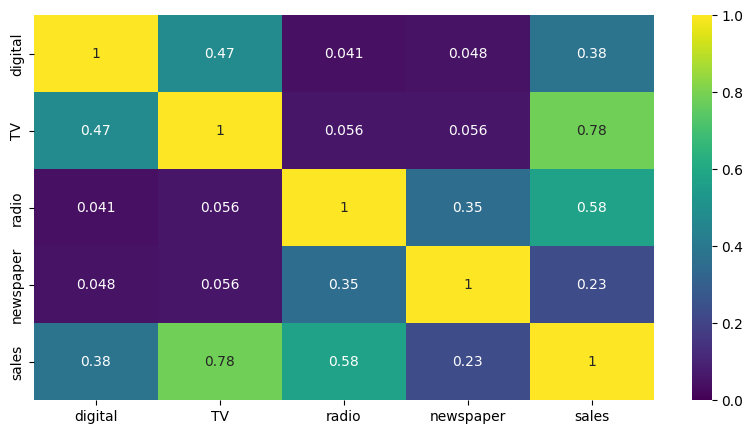

In [8]:
plt.figure(figsize=(10, 5))
sns.heatmap(advertising_df.corr(), annot=True, vmin=0, vmax=1, cmap='viridis')

<Axes: xlabel='[digital]', ylabel='sales'>

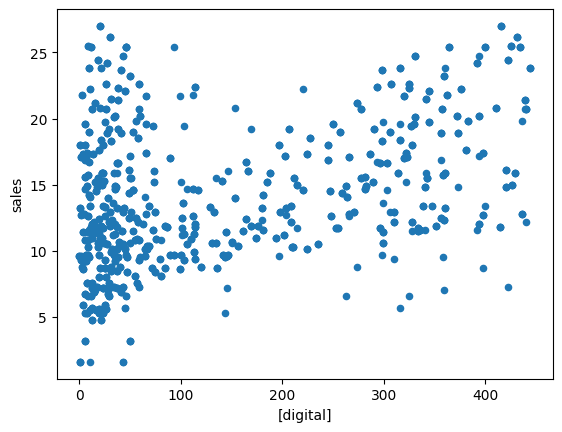

In [9]:
advertising_df.plot(kind='scatter', x=['digital'], y='sales')  # 산점도

Index(['digital', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')


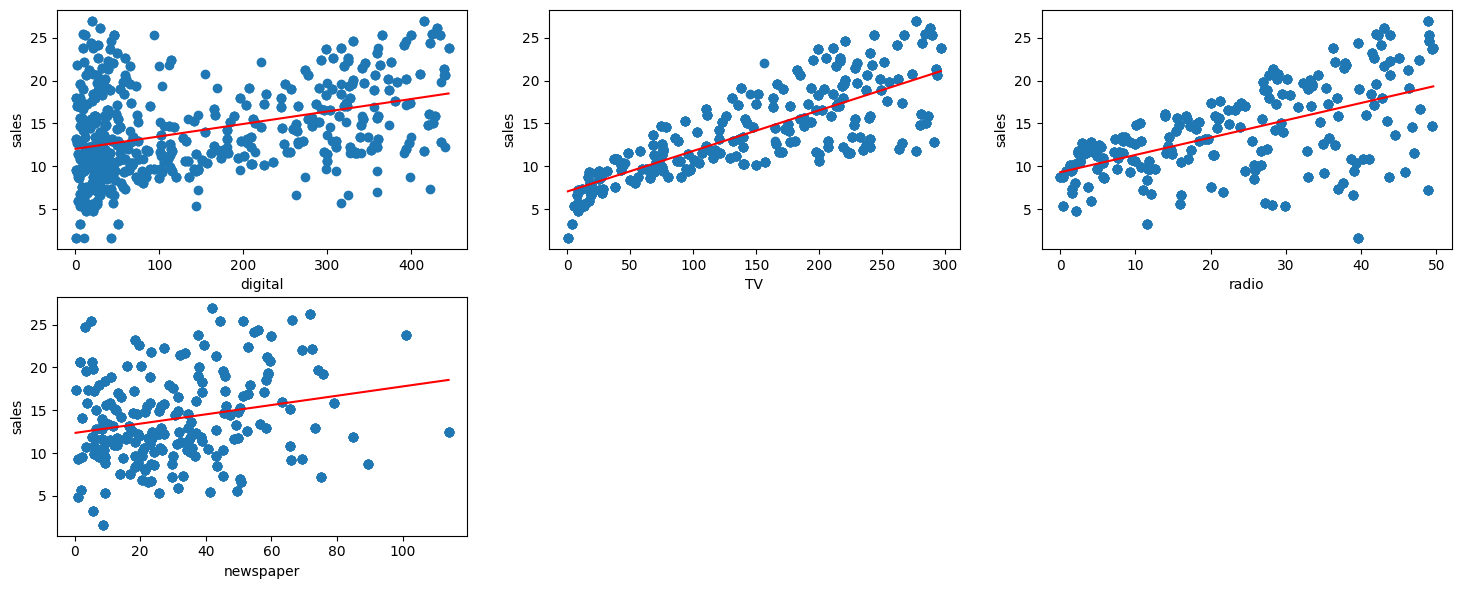

In [10]:
print(advertising_df.columns[0:13])

plt.figure(figsize=(18,18))
#가격 열(마지막 열)을 제외한 모든열을 반복
for i, col in enumerate(advertising_df.columns[0:4]) :
  plt.subplot(5, 3, i+1)  # 열마다 3개의 그래프
  x = advertising_df[col] # x축
  y = advertising_df['sales'] # y축
  plt.plot(x, y, 'o')

  # 회귀선 그리기
  plt.plot(np.unique(x), np.poly1d(np.polyfit(x,y, 1))(np.unique(x)), color='red')
  plt.xlabel(col) # x축 레이블
  plt.ylabel('sales') # y축 레이블

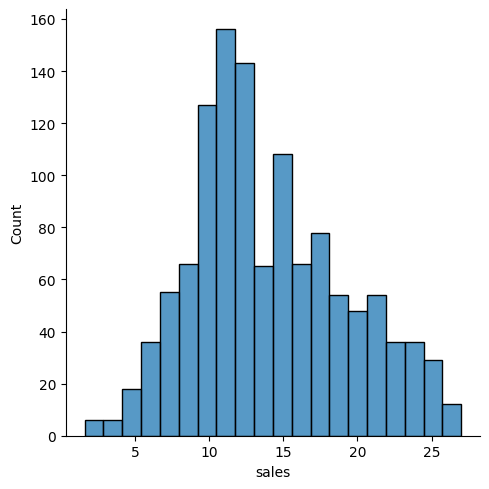

In [11]:
sns.displot(advertising_df, x='sales')

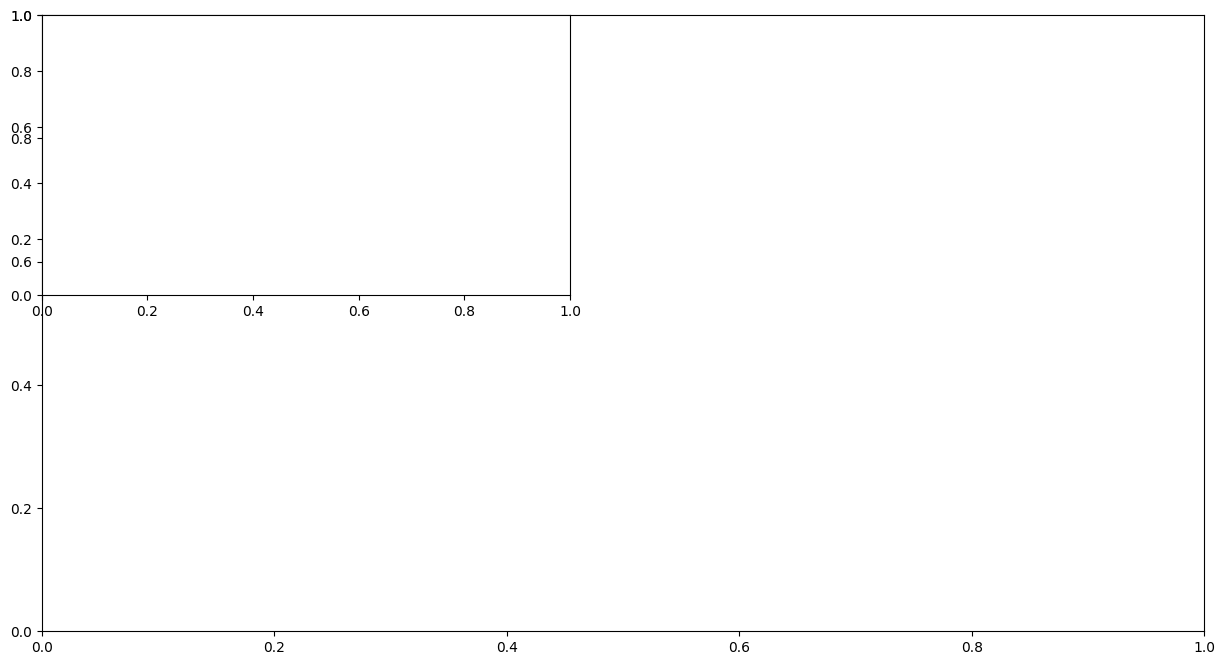

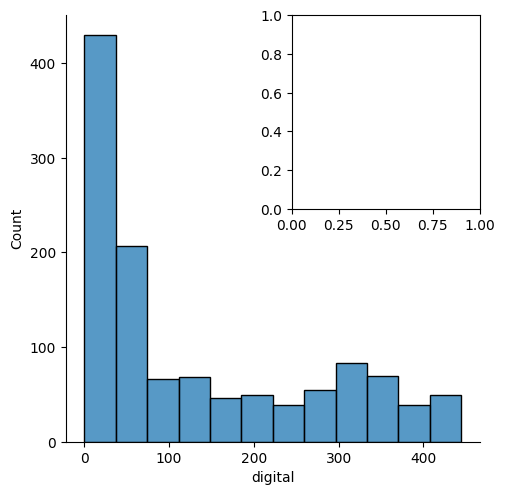

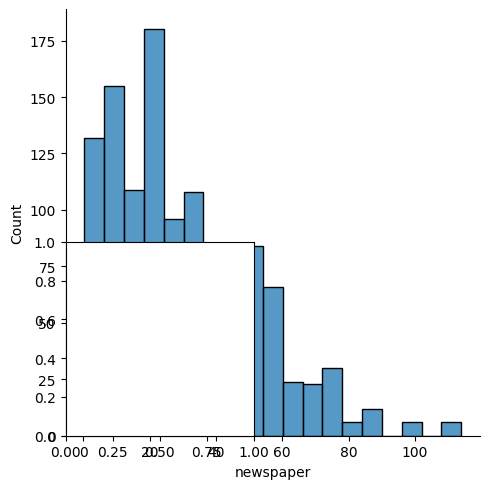

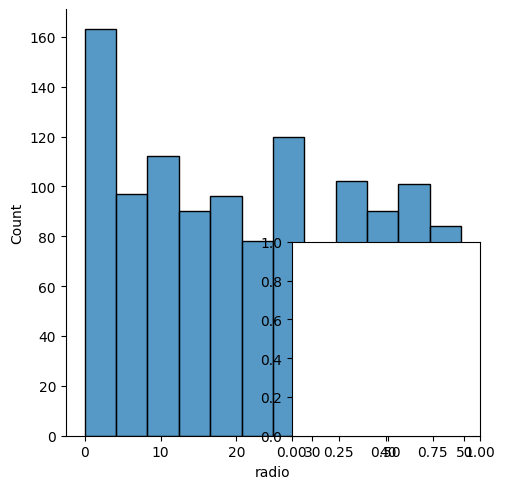

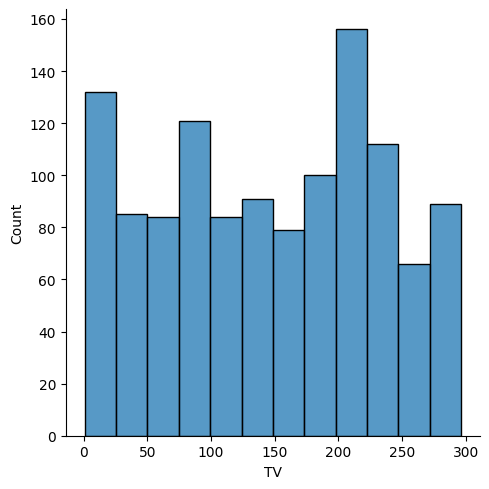

In [12]:
lis = ['digital', 'newspaper', 'radio', 'TV']
plt.subplots(figsize=(15, 8))
index = 1
for i in lis:
  plt.subplot(2,2, index)
  sns.displot(advertising_df[i])
  index += 1

In [13]:
import os
if not os.path.isdir("/content/data"):
  os.makedirs("/content/data")

In [14]:
advertising_df.to_csv('/content/data/advertising.csv', encoding='utf-8', index=False)

In [15]:
!head /content/data/advertising.csv

digital,TV,radio,newspaper,sales
345.15,156.0,37.8,69.2,22.1
66.75,46.0,39.3,45.1,10.4
25.8,18.3,45.9,69.3,9.3
227.25,145.1,41.3,58.5,18.5
271.2,165.2,10.8,58.4,12.9
13.05,8.7,48.9,75.0,7.2
86.25,57.5,32.8,23.5,11.8
180.3,120.2,19.6,11.6,13.2
12.9,8.6,2.1,1.0,4.8
